In [104]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [105]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

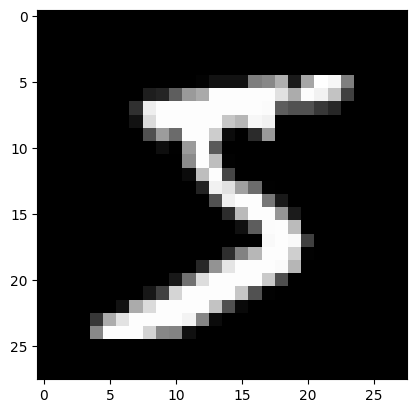

In [106]:
# plt.imshow(x_train[0])
plt.imshow(x_train[0], cmap="gray")

In [107]:
print(f"""
{x_train.shape}
{x_train[0].shape}
""")


(60000, 28, 28)
(28, 28)



In [108]:
# x_train[0]
x_train = x_train/255.0
x_test = x_test/255.0

### so 784 features could be too much to input in a NN - so we condense it down => Encode

In [109]:
encoder_input = keras.Input(shape=(28,28,1), name= "img")
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)
# encoder_output = keras.layers.Dense(32, activation="relu")(x)
# encoder_output = keras.layers.Dense(9, activation="relu")(x)


encoder = keras.Model(encoder_input,encoder_output, name="encoder")

decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_ouput = keras.layers.Reshape((28,28,1))(decoder_input)

# decoder = keras.Model(decoder_input,decoder_ouput, name="decoder")

opt = keras.optimizers.Adam(learning_rate=0.001)

autoencoder = keras.Model(encoder_input, decoder_ouput, name="autoencoder")
autoencoder.summary()

autoencoder.compile(opt, loss="mse")
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1) # notice X and Y mapping is same

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 784)               50960     
                                                                 
 reshape_7 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1688/1688 [============================

In [110]:
x_test[0].shape
example.shape

(9,)

In [111]:
example = encoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
print(example)

1/1 [==============================] - 0s 66ms/step
[1.2145712  2.3855355  1.1111735  0.63278115 1.7312034  1.0105746
 0.3639913  0.38130656 1.3197418  1.7868679  1.1091295  0.9323977
 0.96066844 0.72915536 1.1320548  0.75348586 1.1965468  0.5184941
 1.5740242  1.6667309  1.9338062  1.0981424  0.95672333 2.3750508
 0.         0.85420865 1.0632099  0.18030982 0.3437332  2.0731192
 0.73289394 0.41498983 0.         0.7923843  2.9819088  0.3980064
 0.         0.50724036 0.7665838  3.2994819  0.         1.3597467
 0.6599107  0.74766254 0.6793967  0.8910124  0.38600525 0.9968915
 0.909176   1.1046824  0.58000183 2.360061   0.7355446  1.1077491
 1.3071644  0.69324356 0.7450401  0.4801472  1.9930714  0.23713674
 0.57819164 0.45341232 0.44556224 1.0297805 ]


In [112]:
example.shape

(64,)

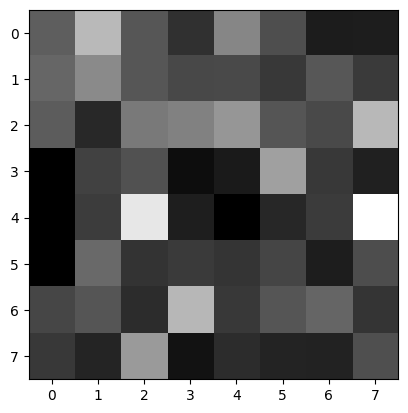

In [114]:
plt.imshow(example.reshape((8,8)), cmap="gray")

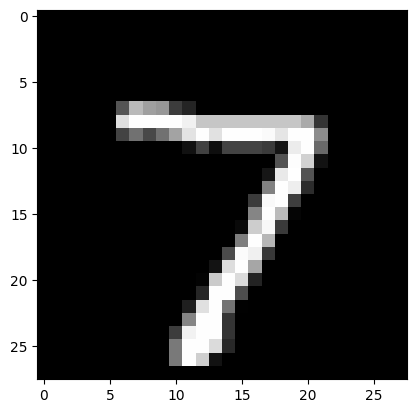

In [115]:
plt.imshow(x_test[0], cmap="gray")

In [116]:
ae_out = autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
print(ae_out.shape)

1/1 [==============================] - 0s 55ms/step
(28, 28, 1)


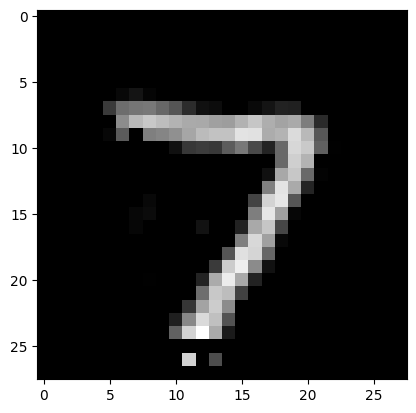

In [117]:
plt.imshow(ae_out, cmap="gray")

### unsupervised learning effect - we dont specifically train the model for input data with noise, but it return a pretty significantly noise reduced version - so it acts as a noise remover too

In [123]:
import random 

def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row=[]
        for pix in row:
            if random.choice(range(100)) <= random_chance:
                new_val = random.uniform(0,1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

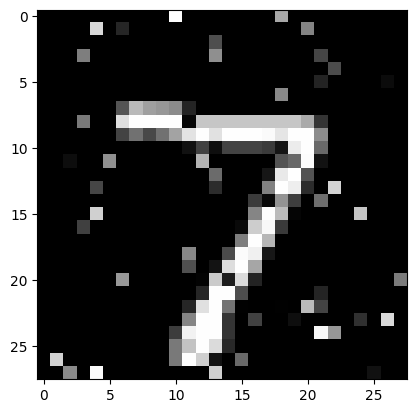

In [124]:
noisy = add_noise(x_test[0])
plt.imshow(noisy, cmap="gray")

1/1 [==============================] - 0s 23ms/step


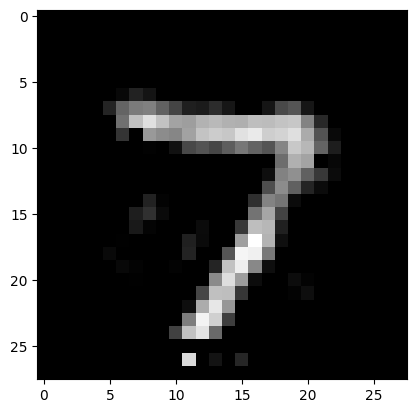

In [126]:
ae_out = autoencoder.predict([noisy.reshape(-1,28,28,1)])[0]
plt.imshow(ae_out, cmap="gray")